## Chapter 3. 평가

분류의 성능 평가 지표 <br>
- 정확도
- 오차행렬
- 정밀도
- 재현율
- F1스코어
- ROC AUC

### 01. 정확도

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표

정확도 = 예측 결과가 동일한 건수 / 전체 예측 데이터 건수

특히 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한<br>
성능 지표가 아님.

멀티 레이블 데이터 세트를<br>
레이블 값이 7인 것만 True, 나머지 값은 모두 False으로 변환해 이진 분류 문제로 바꿈

In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd

class customClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()
# digits 번호가 7이면 1, 아니면 0으로 변환
y = (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=42)

In [16]:
print('y_test 분포 :')
print(pd.Series(y_test).value_counts())

customClf = customClassifier()
customClf.fit(X_train, y_train)

pred = customClf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('정확도 : {0:.4f}'.format(accuracy))

y_test 분포 :
0    409
1     41
dtype: int64
정확도 : 0.9089


단순히 predict() 결과를 0으로 반환함에도 불구하고 450개의 데이터 세트에<br>
수행한 예측 정확도는 90%이다.<br>

이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안된다.

### 02. 오차행렬

이진 분류에서 성능 지표로 잘 활용되는 오차행렬은 학습된 분류 모델이 예측을 수행하면서<br>
얼마나 헷갈리고 있는지도 함께 보여주는 지표

오차행렬은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이<br>
어떤 유형을 가지고 매핑되는지 나타냄.

4분면의 왼쪽, 오른쪽을 예측 클래스 값 기준으로 Negative, Positive로 분류<br>
4분면의 위, 아래를 실제 클래스 값 기준으로 Negative, Positive로 분류

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[409,   0],
       [ 41,   0]], dtype=int64)

array[0, 0] = TN <br>
array[0, 1] = FP <br>
array[1, 0] = FN <br>
array[1, 1] = TP <br>

TN, FP, FN, TP는 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보를 제공

정확도 = 예측 데이터 건수 / 전체 데이터 건수 <br>
       = (TN + TP) / (TN + FP + FN + TP)

### 03. 정밀도와 재현율

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 조금 더 초점을 맞춘 평가 지표.<br>
정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율.<br>
재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 => 민감도(Sensitivity) 또는 TPR(TruePositiveRate)라고도 불림

정밀도 = TP / (FP + TP)
재현율 = TP / (FN + TP)

재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터를 Negative로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우.<br>
정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우.<br>

In [1]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df
    
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print('오차행렬 : ')
    print(cm)
    accuracy = accuracy_score(y_test, y_pred)
    print('정확도 : ', accuracy)
    precision = precision_score(y_test, y_pred)
    print('정밀도 : ', precision)
    recall = recall_score(y_test, y_pred)
    print('재현율 : ', recall)

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

train_df = pd.read_csv('./data/titanic/train.csv')

y_train_df = train_df['Survived']
X_train_df = train_df.drop(['Survived'], axis=1)

X_train_df = transform_features(X_train_df)

In [4]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
get_clf_eval(y_test, y_pred)

오차행렬 : 
[[104  14]
 [ 13  48]]
정확도 :  0.8491620111731844
정밀도 :  0.7741935483870968
재현율 :  0.7868852459016393


C:\Users\jysul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 정밀도/재현율 트레이드오프

분류하려는 업무의 특성상 정밀도 또는 재현율을 특별히 강조돼야 할 경우 분류의
결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
# predict_proba : 데이터 별로 예측 확률을 반환하는 메소드
# 기본 임계값 : 0.5
y_pred_proba = lr_clf.predict_proba(X_test)
y_pred = lr_clf.predict(X_test)
print(np.concatenate([y_pred_proba, y_pred.reshape(-1, 1)], axis=1)[:3])

[[0.46175211 0.53824789 1.        ]
 [0.87863924 0.12136076 0.        ]
 [0.87717092 0.12282908 0.        ]]


C:\Users\jysul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.4

X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
# predict_proba : 데이터 별로 예측 확률을 반환하는 메소드
# 기본 임계값 : 0.5
y_pred_proba = lr_clf.predict_proba(X_test)

y_pred_proba_1 = y_pred_proba[:,1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(y_pred_proba_1)
custom_pred = binarizer.transform(y_pred_proba_1)

get_clf_eval(y_test, custom_pred)


오차행렬 : 
[[98 20]
 [10 51]]
정확도 :  0.8324022346368715
정밀도 :  0.7183098591549296
재현율 :  0.8360655737704918


C:\Users\jysul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 04. F1 스코어

F1 스코어는 정밀도와 재현율을 결합한 지표. <br>
정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐.<br>
F1 스코어 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

In [12]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print('f1 스코어 : {0:.4f}'.format(f1))

f1 스코어 : 0.7805


### 05. ROC 곡선과 AUC

In [ ]:
ROC 곡선은 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.

In [14]:
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
# predict_proba : 데이터 별로 예측 확률을 반환하는 메소드
# 기본 임계값 : 0.5
y_pred_proba = lr_clf.predict_proba(X_test)

y_pred_proba_1 = y_pred_proba[:,1].reshape(-1, 1)

fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba_1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# treshold[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_idx = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_idx)
print(' 샘플 index로 추출한 임계값:', np.round(threshold[thr_idx], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', fprs[thr_idx])
print('샘플 임곗값별 TPR:', tprs[thr_idx])


샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
 샘플 index로 추출한 임계값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR: [0.         0.01694915 0.03389831 0.07627119 0.12711864 0.16949153
 0.20338983 0.46610169 0.58474576 0.68644068 0.79661017]
샘플 임곗값별 TPR: [0.03278689 0.63934426 0.72131148 0.75409836 0.80327869 0.83606557
 0.8852459  0.90163934 0.93442623 0.96721311 0.98360656]


C:\Users\jysul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐.<br>
FPR이 조금씩 커질 때 TPR은 가파르게 커짐을 알 수 있다.

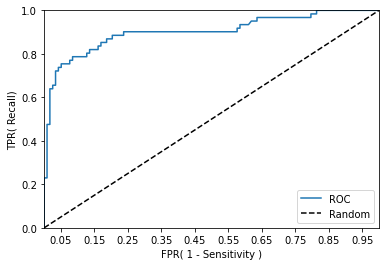

In [24]:
import matplotlib.pyplot as plt

def roc_curve_plt(y_test, y_pred_proba):
    fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba)
    
    # ROC곡선을 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall)')
    plt.legend()

roc_curve_plt(y_test, y_pred_proba_1)

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는데 이용하며<br>
성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정.

AUC 값은 ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울수록 좋은 수치.<br>
AUC 값이 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건.<br>
가운데 대각선 직선은 랜덤 수준의 이진 분류 AUC값으로 0.5.<br>
따라서 보통의 분류는 0.5이상의 AUC 값을 가짐.

In [25]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, y_pred_proba_1)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9024
